In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV, KFold
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler,PowerTransformer,OneHotEncoder,OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score


In [3]:
df = pd.read_csv(r"C:\Users\vodna\OneDrive\Desktop\inno\ml_projects\food_delivery_time_prediction\Food_Delivery_Times.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [5]:
df

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68
...,...,...,...,...,...,...,...,...,...
995,107,8.50,Clear,High,Evening,Car,13,3.0,54
996,271,16.28,Rainy,Low,Morning,Scooter,8,9.0,71
997,861,15.62,Snowy,High,Evening,Scooter,26,2.0,81
998,436,14.17,Clear,Low,Afternoon,Bike,8,0.0,55


In [6]:
df['Courier_Experience_yrs'].unique()

array([ 1.,  2.,  5.,  9.,  6.,  4.,  7., nan,  3.,  8.,  0.])

In [7]:
df.columns

Index(['Order_ID', 'Distance_km', 'Weather', 'Traffic_Level', 'Time_of_Day',
       'Vehicle_Type', 'Preparation_Time_min', 'Courier_Experience_yrs',
       'Delivery_Time_min'],
      dtype='object')

<Axes: xlabel='Distance_km', ylabel='Density'>

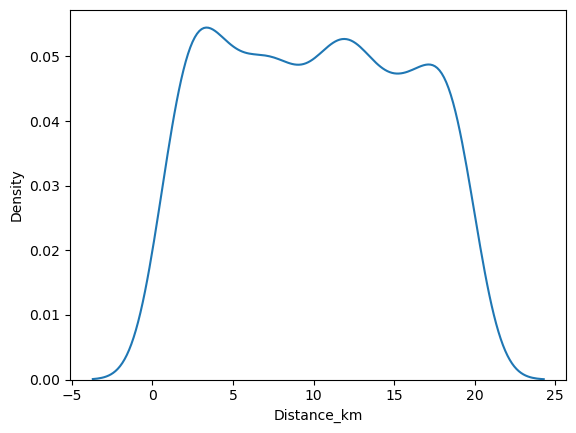

In [8]:
sns.kdeplot(x=df['Distance_km'])

In [9]:
continous=['Distance_km','Preparation_Time_min']
nominal=['Weather','Time_of_Day','Vehicle_Type']
ordinal=['Traffic_Level']

In [10]:
df['Traffic_Level'].unique()

array(['Low', 'Medium', 'High', nan], dtype=object)

In [11]:
orders=[['Low','Medium','High']]

In [12]:
p1=Pipeline(
    [
        ('scalling',MinMaxScaler()),
        ('tran',PowerTransformer())
    ]
)

p2=Pipeline(
    [
        ('impute',SimpleImputer(strategy='most_frequent')),
        ('encode',OneHotEncoder(handle_unknown='ignore'))
    ]
)

p3=Pipeline(
    [
        ('impute',SimpleImputer(strategy='most_frequent')),
        ('encode',OrdinalEncoder(categories=orders))
    ]
)

In [13]:
preprocess=ColumnTransformer(
    [
        ('contiu',p1,continous),
        ('nominal',p2,nominal),
        ('ordinal',p3,ordinal)
    ]
)

In [14]:
from sklearn.tree import DecisionTreeRegressor

In [15]:
model=Pipeline(
    [
        ('preprocess',preprocess),
        ('regressor',DecisionTreeRegressor())
    ]
)

In [16]:
X=df.drop('Delivery_Time_min',axis=1)
y=df['Delivery_Time_min']

In [17]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=43)

In [18]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
r2_score(y_test,y_pred)

0.5325309435957901

In [37]:
model1 = Pipeline([
    ('preprocess', preprocess),
    ('regressor', KNeighborsRegressor())
])

In [39]:
model1.fit(x_train,y_train)
y_pred=model.predict(x_test)
r2_score(y_test,y_pred)

0.7142869646844144

In [40]:
hyper_parameters = {
    'regressor__n_neighbors': range(1, 31),
    'regressor__weights': ['uniform', 'distance'],
    'regressor__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'regressor__p': [1, 2]
}



In [41]:
kf = KFold(n_splits=5, shuffle=True, random_state=1)
grid = GridSearchCV(model, hyper_parameters, scoring='r2', cv=kf, n_jobs=2, verbose=3)

In [42]:
grid.fit(X, y)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('continuous',
                                                                         Pipeline(steps=[('scaling',
                                                                                          MinMaxScaler()),
                                                                                         ('transform',
                                                                                          PowerTransformer())]),
                                                                         ['Distance_km',
                                                                          'Preparation_Time_min']),
                                                                        ('nominal',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('enco...
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encode',
                                                                                          OrdinalEncoder(categories=[['Low',
                                                                                                                      'Medium',
                                                                                                                      'High']]))]),
                                                                         ['Traffic_Level'])])),
                                       ('regressor', KNeighborsRegressor())]),
             n_jobs=2,
             param_grid={'regressor__algorithm': ['auto', 'ball_tree',
                                                  'kd_tree', 'brute'],
                         'regressor__n_neighbors': range(1, 31),
                         'regressor__p': [1, 2],
                         'regressor__weights': ['uniform', 'distance']},
             scoring='r2', verbose=3)

In [43]:
print("Best Parameters:", grid.best_params_)
print("Best R2 Score:", grid.best_score_)

Best Parameters: {'regressor__algorithm': 'auto', 'regressor__n_neighbors': 28, 'regressor__p': 2, 'regressor__weights': 'distance'}
Best R2 Score: 0.7029693106161338
